<a href="https://colab.research.google.com/github/ouardaoui/ML/blob/master/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## worksapce ready 

In [49]:
import tensorflow as tf
import tensorflow_hub as hub
print("version:",tf.__version__)
print("version tf_hub",hub.__version__)

version: 2.4.1
version tf_hub 0.11.0


In [50]:
#check label of our data 
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     b9f6625029445139bd765939c4901cc6  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


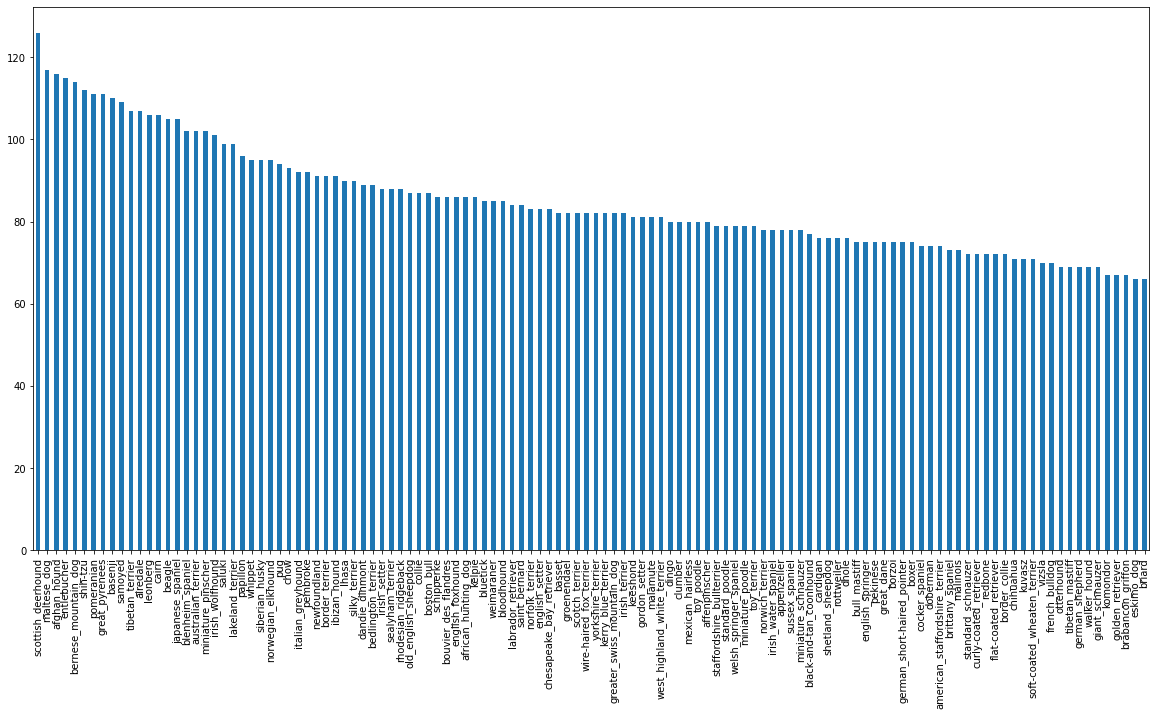

In [51]:
#how many images are thre of each breed ?
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

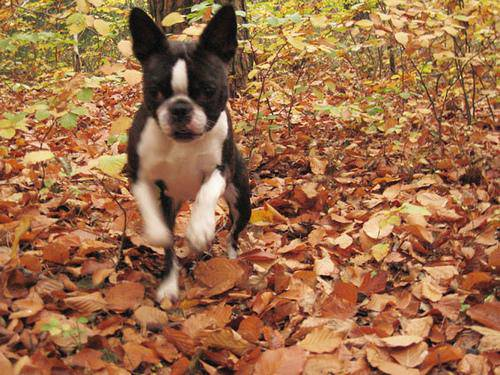

In [95]:
# let's view an image 
from IPython.display import Image
#Image("/content/drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")
Image(filenames[0])

In [84]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels)#does same time above
len(labels)

10222

In [54]:
#find the unique label value 
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [55]:
#turn a single value label into a array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [85]:
#turn every label  into a array of booleans
booleans_labels = [label == unique_breeds for label in labels]
booleans_labels[0:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [86]:
#turnning boolean array into integers
print(labels[0])#original labels 
print(np.where(unique_breeds == labels[0]))#index where label occurs 
print(booleans_labels[0].argmax())#index where label occurs in boolean array
print(booleans_labels[0].astype(int))#there will be 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### creating own  validation set
since data from kaggle doesn't come with validation set we 're go to create own.

In [88]:
#setup X & y variables
filenames = ["/content/drive/MyDrive/dog-breed-identification/train/" + fname for fname in labels_csv["id"]+".jpg"]
X = filenames
y = booleans_labels

X[:10]

['/content/drive/MyDrive/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

we 're giogng to start exprementation with 1000 images and increase as needed

In [69]:
#set a number of image do you use for experementing
NUM_IMAGES = 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [70]:
#split them into training and validation of total size NUM_IMAGES
from sklearn.model_selection import train_test_split
X_train ,X_val, y_train ,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.20,random_state =42)
len(X_train),len(X_val),len(y_train),len(y_val)

(800, 200, 800, 200)

##for processing images into to Tensors we 're write a fuction do a few things :
###1-take an image filepath as input
###2-use tensorflow  to read the file and save it to a variable
###3- turn our 'image' (a jpg) into the tensor of (224,244)
###4- normalize our image (cvt color channel value from 0-255 to 0-1 ) 
###5- resize the 'image' to be shape
###6- return the modified 'image

In [90]:
#convert image to NumPy array
from matplotlib.pyplot import imread  
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [72]:
image.max(),image.min()

(255, 0)

In [73]:
#turn image into Tensors
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [64]:
#difine image size
IMG_SIZE = 224
#create a functionfor preccesing image
def process_image(image_path, image_size=IMG_SIZE):
  #read a image file
  image = tf.io.read_file(image_path)
  #turn jpeg image into to tensers with 3 colours channels
  image = tf.io.decode_jpeg(image,channels=3)
  #cvt the colour channel value from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  #resize image to our desired value
  image = tf.image.resize(image , size=[IMG_SIZE,IMG_SIZE])
  return image

##Turning our data to return the batches size32

In [65]:
#create a simple function to return a tuple(image,label)
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [74]:
#demo of the above 
(process_image(X[42]),tf.constant(y[42])) 


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [75]:
# Define the batch size, 32 is a good default
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [21]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [35]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

#visualisation data batches


In [44]:
import matplotlib.pyplot as plt
#Creat a function for view a images in data batch
def show_25_images(images,labels):
  """
  Dispalys a plot of 25 images and their labels from data batch 
  """
  #setup the figure 
  plt.figure(figzise=(10,10))
  #loop through 25 (for displaying 25 images)
  for i in range(25):
    #create subplots(5 rows,5 columns)
    ax =ply.subplot(5,5,i+1)
    # dispaly an image
    plt.imshow(images[i])
    # add the image label as the title
    plt.title(unique_breeds(labels[i].argmax()))  

In [45]:
unique_breeds  

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [60]:
y[0].argmax

<function ndarray.argmax>